## 6.4 Supervised Machine Learning: Regression - Milena Nedyalkova

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep and regression analysis

### Hypotheses: Month has no effect on the number of departuring flights.

### 1. Importing libraries and data

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
# File path and name
data_path = r'C:\\Users\\PC\\Desktop\\CareerFoundry Data Analytics\\airport_traffic_2024_clean.csv'
data = pd.read_csv(data_path)

In [142]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

### 2. Data cleaning

In [143]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month Code', 'Month', 'Flight Date',
       'Airport ICAO Code', 'Airport Name', 'Country', 'Number of Departures',
       'Number of Arrivals', 'Total flights'],
      dtype='object')

In [144]:
data.head(5)

,Unnamed: 0,Year,Month Code,Month,Flight Date,Airport ICAO Code,Airport Name,Country,Number of Departures,Number of Arrivals,Total flights
0,0,2024,1,JAN,2024-01-01,LATI,Tirana,Albania,73,74,147
1,1,2024,1,JAN,2024-01-01,UDYZ,Yerevan,Armenia,52,48,100
2,2,2024,1,JAN,2024-01-01,LOWG,Graz,Austria,6,8,14
3,3,2024,1,JAN,2024-01-01,LOWI,Innsbruck,Austria,22,25,47
4,4,2024,1,JAN,2024-01-01,LOWK,Klagenfurt,Austria,2,2,4


In [145]:
data.shape

(114754, 11)

In [146]:
# Check for missing values

data.isnull().sum()

Unnamed: 0              0
Year                    0
Month Code              0
Month                   0
Flight Date             0
Airport ICAO Code       0
Airport Name            0
Country                 0
Number of Departures    0
Number of Arrivals      0
Total flights           0
dtype: int64

In [147]:
# Check for duplicates

dups = data.duplicated()  # No duplicates found
dups.shape

(114754,)

In [148]:
# Extreme values check 

sns.displot(data['Total flights'], bins = 25) 

In [149]:
data['Total flights'].mean() 

np.float64(144.62166024713736)

In [150]:
data['Total flights'].median() 

40.0

In [151]:
data['Total flights'].max() 

1612

### 3. Data prep and regression analysis

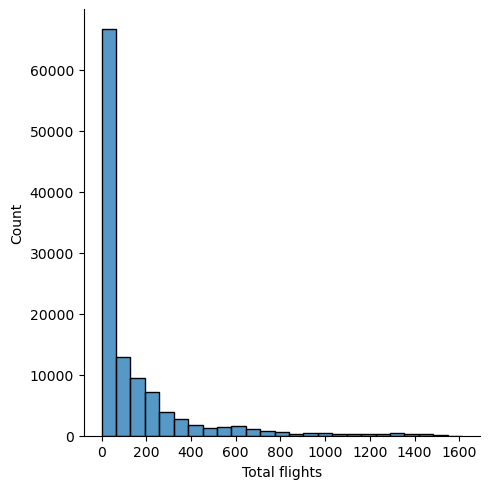

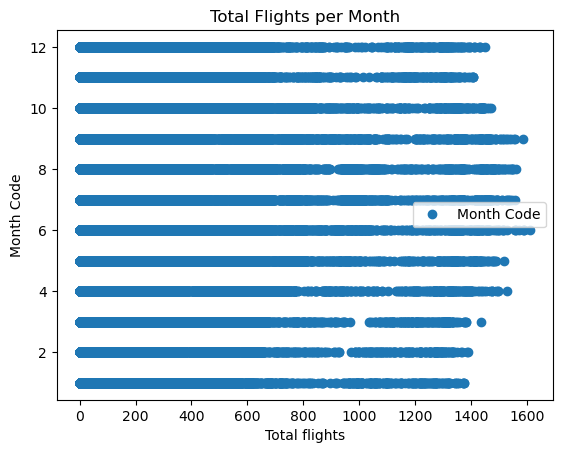

In [152]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'Total flights', y='Month Code',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Flights per Month')  
plt.xlabel('Total flights')  
plt.ylabel('Month Code')  
plt.show()

In [153]:
#Regression for Total number of flights

X = data[['Month Code']].values 
y_departures = data['Total flights'].values

# Split

X_train, X_test, y_train, y_test = train_test_split(X, y_departures, test_size=0.2, random_state=42)

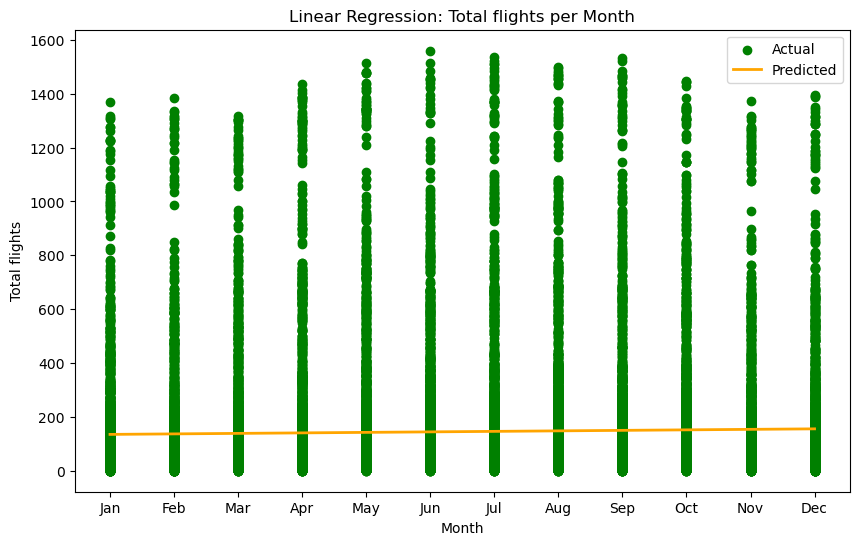

In [154]:
# Fit model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Month': X_test.flatten(),
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Month')

# Plot
plt.figure(figsize=(10,6))
plt.scatter(plot_df['Month'], plot_df['Actual'], color='green', label='Actual')
plt.plot(plot_df['Month'], plot_df['Predicted'], color='orange', label='Predicted', linewidth=2)
plt.xticks(ticks=np.arange(1,13), labels=month_labels)
plt.xlabel('Month')
plt.ylabel('Total flights')
plt.title('Linear Regression: Total flights per Month')
plt.legend()
plt.show()



In [155]:
# Performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Total flights - MSE:", mse)
print("Total flights - R² score:", r2)

# Comparison

comparison = pd.DataFrame({
    'Month': plot_df['Month'],
    'Actual': plot_df['Actual'],
    'Predicted': y_pred
}).sort_values(by='Month')
print(comparison)

Total flights - MSE: 56128.88385245682
Total flights - R² score: 0.0005456963176776464
       Month  Actual   Predicted
22950      1       3  138.669613
8266       1      12  136.795312
8274       1     244  153.664026
4281       1       7  134.921010
8310       1       4  140.543915
...      ...     ...         ...
7664      12     165  149.915423
15875     12      20  153.664026
9336      12     143  144.292518
15193     12       2  148.041121
7178      12       1  134.921010

[22951 rows x 3 columns]


### Linear regression assumes a straight-line relationship between predictor and response, but in this dataset "Total flights" clearly follows a seasonal pattern. With only Month as a predictor, the model cannot capture cyclical fluctuations, so it collapses to predicting values close to the overall mean. This is why the results show a very low R² (≈0) and predicted values clustered in a narrow band (≈135–155), while actual values vary widely.